In [18]:
import pandas as pd

In [19]:
df = pd.read_excel('4.1.2.xlsx', sheet_name='data')
df.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Source,GeoInfoUrl,FootNote,Education level,Location,Nature,Quantile,Reporting Type,Sex,Units
0,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,57.6,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,ALLAREA,N,_T,G,FEMALE,PERCENT
1,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,74.9,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,PRIMAR,ALLAREA,N,_T,G,FEMALE,PERCENT
2,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,60.4,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,LOWSEC,ALLAREA,N,_T,G,BOTHSEX,PERCENT
3,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,37.5,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,UPPSEC,ALLAREA,N,_T,G,BOTHSEX,PERCENT
4,4,4.1,4.1.2,SE_TOT_CPLR,"Completion rate, by sex, location, wealth quin...",1,World,2000,39.0,2000,...,UNESCO Institute for Statistics. Data extract...,NaN,NaN,UPPSEC,ALLAREA,N,_T,G,MALE,PERCENT


In [20]:
df= df.drop(['Goal', 'Target', 'Indicator', 'SeriesCode', 'GeoAreaCode', 'SeriesDescription', 'Source', 'Units', 'TimePeriod', 'UpperBound', 'LowerBound', 'BasePeriod', 'GeoInfoUrl', 'FootNote', 'Quantile', 'Reporting Type', 'TimeCoverage', 'Nature'], axis=1)
df.head()


,GeoAreaName,Value,Time_Detail,Education level,Location,Sex
0,World,57.6,2000,LOWSEC,ALLAREA,FEMALE
1,World,74.9,2000,PRIMAR,ALLAREA,FEMALE
2,World,60.4,2000,LOWSEC,ALLAREA,BOTHSEX
3,World,37.5,2000,UPPSEC,ALLAREA,BOTHSEX
4,World,39.0,2000,UPPSEC,ALLAREA,MALE


In [21]:
df_indo= df[df['GeoAreaName'] == 'Indonesia'] 
df_indo.head()

,GeoAreaName,Value,Time_Detail,Education level,Location,Sex
49193,Indonesia,92.22,2000,PRIMAR,ALLAREA,BOTHSEX
49194,Indonesia,57.63,2000,UPPSEC,URBAN,BOTHSEX
49195,Indonesia,66.82,2000,LOWSEC,ALLAREA,MALE
49196,Indonesia,22.43,2000,UPPSEC,RURAL,BOTHSEX
49197,Indonesia,39.81,2000,UPPSEC,ALLAREA,BOTHSEX


In [23]:
df_indo['Education level'].unique()

array(['PRIMAR', 'UPPSEC', 'LOWSEC'], dtype=object)

In [24]:
df_indo['Location'].unique()

array(['ALLAREA', 'URBAN', 'RURAL'], dtype=object)

Rasio perempuan dan laki-laki yang menyelesaikan pendidikan pada jenjang tertentu di Indonesia berdasarkan area


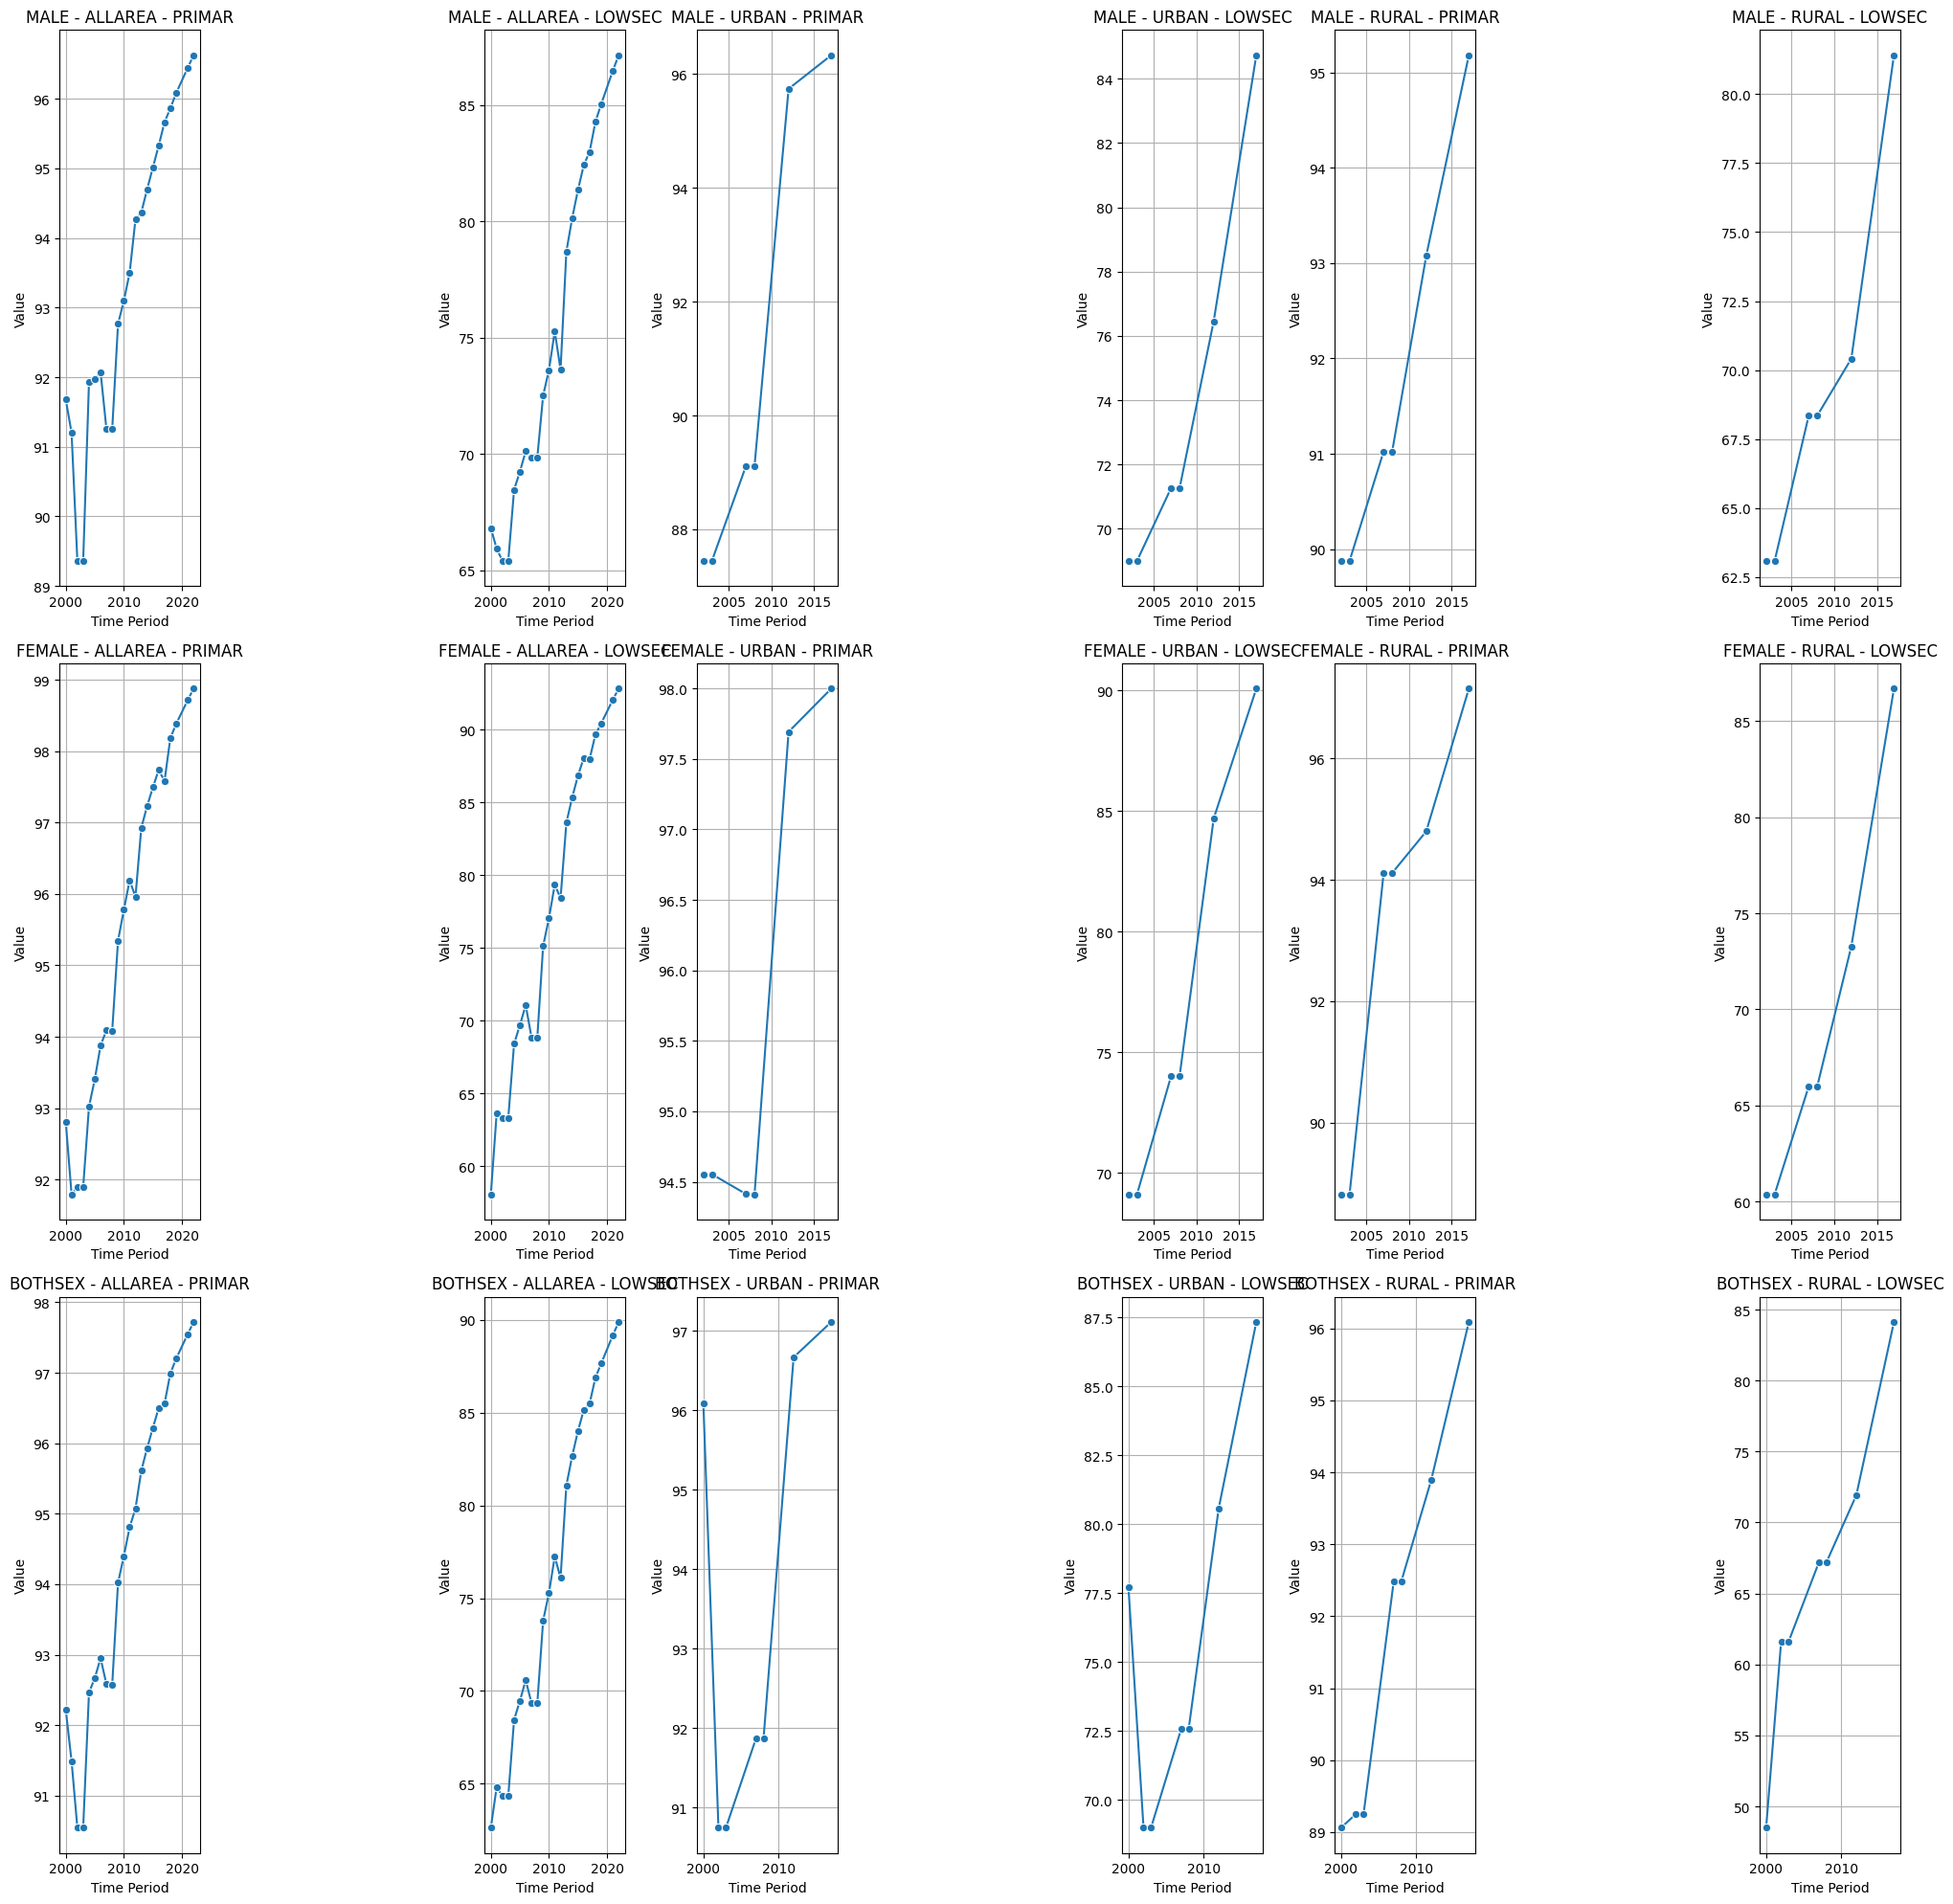

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

genders = ['MALE', 'FEMALE', 'BOTHSEX']
educations = ['PRIMAR', 'UPSEC', 'LOWSEC']
areas = ['ALLAREA', 'URBAN', 'RURAL']

# Tentukan jumlah baris dan kolom untuk subplots
nrows = len(genders)
ncols = len(areas) * len(educations)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
fig.subplots_adjust(top=10)

# Iterasi melalui tiap gender, area, dan education level
for i, gender in enumerate(genders):
    for j, area in enumerate(areas):
        for k, education in enumerate(educations):
            # Filter data untuk masing-masing gender, area, dan education level
            data_filtered = df_indo[
                (df_indo['Sex'] == gender) &
                (df_indo['Location'] == area) &
                (df_indo['Education level'] == education)
            ]
            
            # Menentukan posisi subplot
            col_index = j * len(educations) + k
            
           # Periksa apakah data_filtered kosong
            if not data_filtered.empty:
                # Plotkan line graph untuk masing-masing gender, skill, dan education level
                sns.lineplot(data=data_filtered, x='Time_Detail', y='Value', ax=ax[i, col_index], marker='o', errorbar=None)
                # Set title dan label
                ax[i, col_index].set_title(f'{gender} - {area} - {education}')
                ax[i, col_index].set_xlabel('Time Period')
                ax[i, col_index].set_ylabel('Value')
                ax[i, col_index].grid(True)
            else:
                # Hapus axis jika tidak ada data
                fig.delaxes(ax[i, col_index])

# Menyempurnakan layout agar tidak overlap
plt.tight_layout()

# Menampilkan plot
print('Rasio perempuan dan laki-laki yang menyelesaikan pendidikan pada jenjang tertentu di Indonesia berdasarkan area')
plt.show()
